## This code was used to execute the Exploratory Factor Analysis for my research

Author: Ruward Karper <br/>
Date: June 2020 

Please note: all code blocks need to be executed in the corresponding order for this code to work. Executing code blocks too fast after one another may also result in errors. Since I am under a NDA for the use of the data in my project this code is only a reference with regard to how I calculated the EFA. I can unfortunately not share the data without the explicit consent of the data subjects. 

In [1]:
# import required libraries
import statistics
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from factor_analyzer import FactorAnalyzer

In [2]:
# change directory to location of survey data. This code requires the survey data in order to run 
os.chdir(r"D:\Transcripts")  # change directory according to location of survey data on your device 
print("Directory changed successfully to " + str(os.getcwd()))

Directory changed successfully to D:\Transcripts


In [3]:
df = pd.read_excel(r'BEP_survey_data.xlsx')  # load survey data into pandas dataframe
df_small = df.drop(df.columns[[0,1,2,3,4,5]], axis=1)  # only keep the coachability ratings 
df_xsmall = df_small.drop(df_small.index[0])  # drop zero row with titles
df_xsmall.dropna(inplace=True)  # drop rows with NaN values
df_xsmall

,coach1,coach2,coach3,coach4,coach5,coach6,coach7,coach8,coach9
1,4,4,4,3,4,4,3,2,4
2,3,3,3,3,4,3,2,2,4
3,4,3,4,5,3,2,3,2,4
4,4,3,4,4,4,4,3,2,4
5,3,4,3,3,4,2,2,1,4
6,4,5,4,5,5,3,3,2,4
7,3,4,4,4,4,4,4,3,4
8,3,4,4,3,3,4,3,3,4
9,4,4,4,5,4,3,3,3,5
10,4,4,4,4,4,4,4,2,4


In [4]:
df_xsmall = df_xsmall.astype(float)  # convert all values in the dataframe to the float type 

In [5]:
df_xsmall.head()

,coach1,coach2,coach3,coach4,coach5,coach6,coach7,coach8,coach9
1,4.0,4.0,4.0,3.0,4.0,4.0,3.0,2.0,4.0
2,3.0,3.0,3.0,3.0,4.0,3.0,2.0,2.0,4.0
3,4.0,3.0,4.0,5.0,3.0,2.0,3.0,2.0,4.0
4,4.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0
5,3.0,4.0,3.0,3.0,4.0,2.0,2.0,1.0,4.0


In [6]:
# calculate the bartlett sphericity for this data
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity 
chi_square_value,p_value=calculate_bartlett_sphericity(df_xsmall)
chi_square_value, p_value  # return the chi-square and p-value

(239.3335109673644, 3.1830223686992355e-32)

In [7]:
# calculate the kmo value for this data 
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_xsmall)
kmo_model

0.8104613775782621

In [8]:
fa = FactorAnalyzer(n_factors=2)  # declare factor analyzer. The n_factors degree of 2 was established by trial and error
fa.fit(df_xsmall)  # apply the factor analyzer to the data

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=2, rotation='promax',
        rotation_kwargs={}, use_smc=True)

In [9]:
# get the eigenvalues of each coachability variable 
ev, v=fa.get_eigenvalues()
ev

array([3.95185976, 1.36298661, 0.94087937, 0.67798733, 0.59463912,
       0.49266537, 0.41753497, 0.32883997, 0.2326075 ])

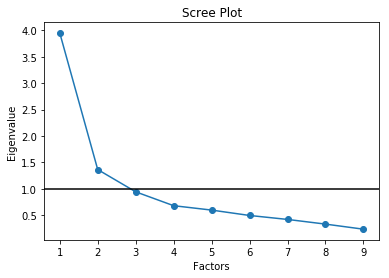

In [10]:
# plot the Scree plot
plt.scatter(range(1,df_xsmall.shape[1]+1),ev)
plt.plot(range(1,df_xsmall.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1,c='k')
plt.savefig('scree.png')

In [11]:
print(fa.loadings_)  # print the factor loadings 

[[ 0.52891563  0.31905854]
 [ 0.49449872  0.32764632]
 [ 0.71538504  0.22488098]
 [ 0.64131979 -0.14972326]
 [ 0.53601537  0.22468537]
 [-0.27797426  0.77670403]
 [ 0.06863602  0.6608137 ]
 [ 0.05493162  0.39581061]
 [ 0.83532859 -0.25646564]]


Factor names: active feedback seeking (AFS) | commitment

In [12]:
fa.get_factor_variance()  # get factor variance in order to determine the cumulative variance explained by factors 

(array([2.51743198, 1.59500705]),
 array([0.27971466, 0.17722301]),
 array([0.27971466, 0.45693767]))

Cumulative variance of the 2 factors is ~46%